# **Exploratory data analysis of precipitation data**

In this dataset, precipitation is defined as the monthly mean of the liquid water equivalent daily precipitation, averaged over a 30 year period.
For future periods, the indicator is given as a relative change against the reference period (1971-2000).

We analyse projections for the years 2040, 2070, and 2100, conducting exploratory data analysis to comprehend the dataset and identify underlying patterns.

### **Load data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import xarray as xr

# Load the NetCDF file
data_path = '/content/drive/MyDrive/DS Project/Omdena X Valutus/Processed_Merged_Precipitation_Data.nc'
data = xr.open_dataset(data_path)
data.head()

<xarray.Dataset>
Dimensions:            (y: 5, x: 5, time: 5)
Coordinates:
    lon                (y, x) float32 ...
    lat                (y, x) float32 ...
  * time               (time) datetime64[ns] 2040-01-31T12:00:00 ... 2040-05-...
Dimensions without coordinates: y, x
Data variables:
    prAdjust_ymonmean  (time, y, x) float32 ...

In [12]:
data.attrs

{}

In [13]:
data['prAdjust_ymonmean'].attrs

{'comment': 'at surface; includes both liquid and solid phases from all types of clouds (both large-scale and convective)',
 'standard_name': 'mean_precipitation_index_per_time_period',
 'long_name': 'precipitation (seasonality)',
 'units': '%',
 'associated_files': '-',
 'cell_methods': 'time:mean',
 'cell_measures': 'area:areacella',
 'history': '-',
 'title': 'precipitation (seasonality)',
 'variable': 'prAdjust_ymonmean'}

In [4]:
df = data.to_dataframe()
# df = df.reset_index()
df

lon        lat  prAdjust_ymonmean
y   x   time                                                        
0   0   2040-01-31 12:00:00  -8.229275  27.802845                NaN
        2040-02-29 12:00:00  -8.229275  27.802845          22.511963
        2040-03-31 12:00:00  -8.229275  27.802845          45.338013
        2040-04-30 12:00:00  -8.229275  27.802845          -2.364348
        2040-05-31 12:00:00  -8.229275  27.802845         -50.576218
...                                ...        ...                ...
949 900 2100-08-31 12:00:00  68.130127  61.678524                NaN
        2100-09-30 12:00:00  68.130127  61.678524                NaN
        2100-10-31 12:00:00  68.130127  61.678524                NaN
        2100-11-30 12:00:00  68.130127  61.678524                NaN
        2100-12-31 12:00:00  68.130127  61.678524                NaN

[30814200 rows x 3 columns]

In [5]:
# Display basic information about the dataset
data.info()

xarray.Dataset {
dimensions:
	y = 950 ;
	x = 901 ;
	time = 36 ;

variables:
	float32 lon(y, x) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:_CoordinateAxisType = Lon ;
	float32 lat(y, x) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:_CoordinateAxisType = Lat ;
	float32 prAdjust_ymonmean(time, y, x) ;
		prAdjust_ymonmean:comment = at surface; includes both liquid and solid phases from all types of clouds (both large-scale and convective) ;
		prAdjust_ymonmean:standard_name = mean_precipitation_index_per_time_period ;
		prAdjust_ymonmean:long_name = precipitation (seasonality) ;
		prAdjust_ymonmean:units = % ;
		prAdjust_ymonmean:associated_files = - ;
		prAdjust_ymonmean:cell_methods = time:mean ;
		prAdjust_ymonmean:cell_measures = area:areacella ;
		prAdjust_ymonmean:history = - ;
		prAdjust_ymonmean:title = precipitation (seasonality) ;
		prAdjust_ymonmean:variable = prAdjust

**Data overview:**
- Longitude (lon): Defined over the y and x dimensions, 'lon' represents the longitude coordinates in degrees east.
- Latitude (lat): Defined over the y and x dimensions, 'lat' represents the latitude coordinates in degrees north.
-'prAdjust_ymonmean': This variable includes precipitation from all cloud types and phases, averaged over a monthly timescale, expressed as a percentage change relative to a reference period.


### **Summary statistics**

In [6]:
mean = data['prAdjust_ymonmean'].mean().values
std_dev = data['prAdjust_ymonmean'].std().values
min_val = data['prAdjust_ymonmean'].min().values
max_val = data['prAdjust_ymonmean'].max().values
quartiles = data['prAdjust_ymonmean'].quantile([0.25, 0.5, 0.75]).values

summary_statistics = {
    'Mean': mean,
    'Standard Deviation': std_dev,
    'Minimum': min_val,
    'Maximum': max_val,
    '25th Percentile': quartiles[0],
    'Median': quartiles[1],
    '75th Percentile': quartiles[2]
}

summary_statistics

{'Mean': array(3.4237256, dtype=float32),
 'Standard Deviation': array(19.832588, dtype=float32),
 'Minimum': array(-50.71322, dtype=float32),
 'Maximum': array(58.065815, dtype=float32),
 '25th Percentile': -8.555227279663086,
 'Median': 4.125968933105469,
 '75th Percentile': 16.373733520507812}

## **Visualisations**
### **1. Relative Change in Precipitation**

<ipython-input-10-aa59704c9a47>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reversed_cmap = plt.cm.get_cmap('coolwarm').reversed()
<ipython-input-10-aa59704c9a47>:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(median_time_slice['lon'], median_time_slice['lat'], median_time_slice, cmap=reversed_cmap)


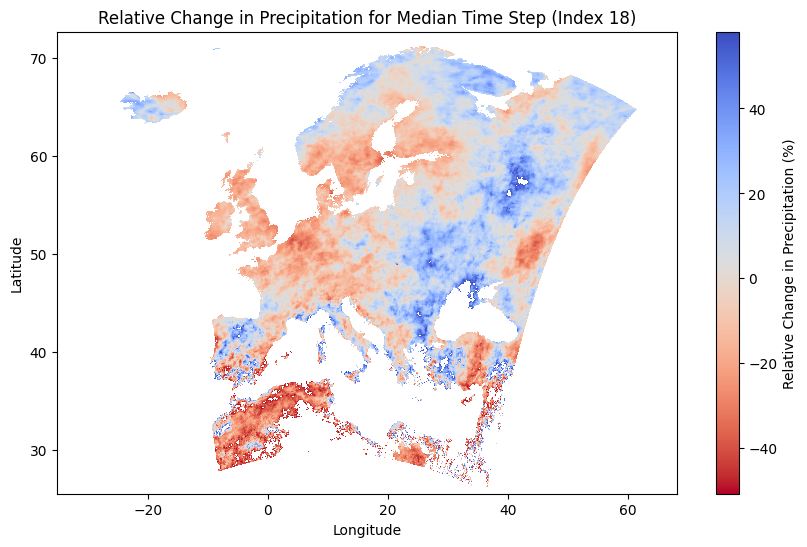

In [10]:
import matplotlib.pyplot as plt

# To choose a more representative time slice of the whole dataset, we'll calculate the median time step index.
# This will give us a time slice that is centrally located within the entire time series, providing a more representative view of the changes over time.

# Calculate the median index
median_time_index = int(data['prAdjust_ymonmean'].sizes['time'] / 2)

# Selecting the median time slice for visualisation
median_time_slice = data['prAdjust_ymonmean'].isel(time=median_time_index)

# Create a reversed version of the 'coolwarm' colormap
reversed_cmap = plt.cm.get_cmap('coolwarm').reversed()

# Plotting the median time slice
plt.figure(figsize=(10, 6))
plt.pcolormesh(median_time_slice['lon'], median_time_slice['lat'], median_time_slice, cmap=reversed_cmap)
plt.colorbar(label='Relative Change in Precipitation (%)')
plt.title(f'Relative Change in Precipitation for Median Time Step (Index {median_time_index})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The plot visualises the relative change in precipitation at the median time step of the dataset, providing a more representative view of changes across the entire time series.

- **Central Representation:** By selecting the median time step, the visualisation aims to capture a more central and potentially more representative snapshot of precipitation changes within the dataset.

- **Spatial Distribution:** We observe significant spatial variation in precipitation changes across the region. This variation highlights areas that may be particularly vulnerable to increases or decreases in precipitation, informing regional climate adaptation strategies.


`We can see that the areas where relative cahnge is percentage is -40% are marked with warm color.
Area where the relative change in percentage is +40 % means there has been an increase in precipiatation are marked with cool colors.`


### **2. Time Series Analysis**

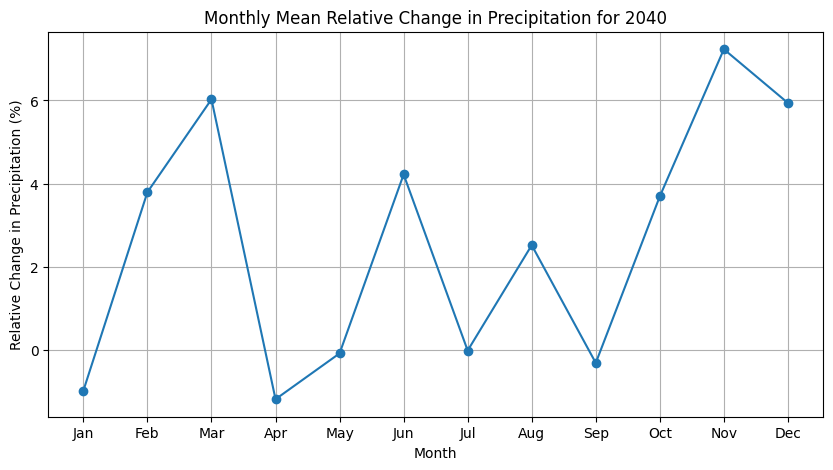

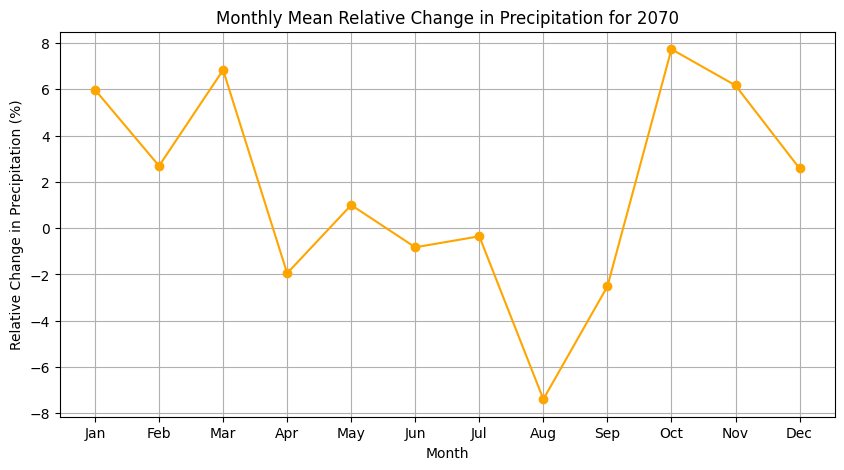

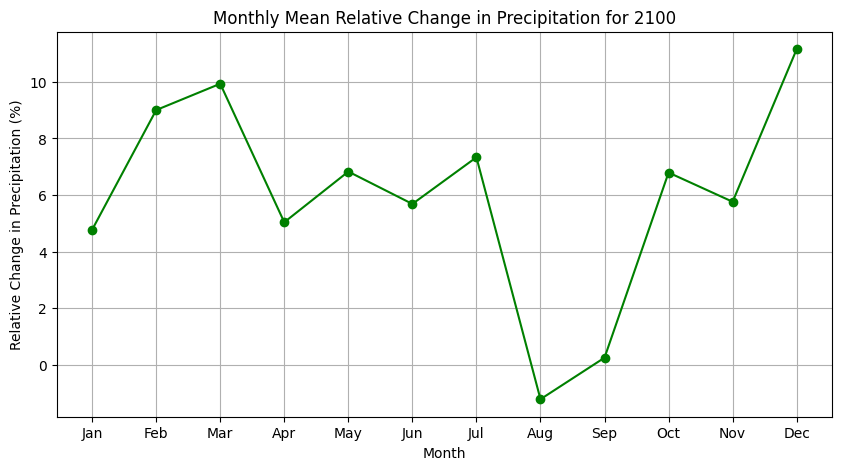

In [11]:
# Extracting the data for each year
year_2040_data = data['prAdjust_ymonmean'].sel(time='2040')
year_2070_data = data['prAdjust_ymonmean'].sel(time='2070')
year_2100_data = data['prAdjust_ymonmean'].sel(time='2100')

# Averaging over the 'y' and 'x' dimensions to get the mean relative change in precipitation for each month of 2040
monthly_mean_2040 = year_2040_data.mean(dim=['y', 'x'])
monthly_mean_2070 = year_2070_data.mean(dim=['y', 'x'])
monthly_mean_2100 = year_2100_data.mean(dim=['y', 'x'])

# Creating a list of month labels for the x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Setting up the plot for 2040
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_2040['time.month'], monthly_mean_2040, marker='o', linestyle='-')
plt.title('Monthly Mean Relative Change in Precipitation for 2040')
plt.xlabel('Month')
plt.ylabel('Relative Change in Precipitation (%)')
plt.grid(True)
plt.xticks(range(1, 13), month_labels)  # Applying month labels
plt.show()

# Setting up the plot for 2070
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_2070['time.month'], monthly_mean_2070, marker='o', linestyle='-', color='orange')
plt.title('Monthly Mean Relative Change in Precipitation for 2070')
plt.xlabel('Month')
plt.ylabel('Relative Change in Precipitation (%)')
plt.grid(True)
plt.xticks(range(1, 13), month_labels)  # Using the same month labels
plt.show()

# Setting up the plot for 2100
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_2100['time.month'], monthly_mean_2100, marker='o', linestyle='-', color='green')
plt.title('Monthly Mean Relative Change in Precipitation for 2100')
plt.xlabel('Month')
plt.ylabel('Relative Change in Precipitation (%)')
plt.grid(True)
plt.xticks(range(1, 13), month_labels)  # Using the same month labels
plt.show()

All three graphs display variability in precipitation change throughout the year, indicating seasonal influences on precipitation patterns. This suggests that certain times of the year are consistently more prone to changes in precipitation than others, which could have significant implications for seasonal water availability, agricultural cycles, and ecosystem dynamics.

In [ ]:
# Install the DagsHub python client
!pip install -q dagshub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.7/207.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s 

In [ ]:
from dagshub.notebook import save_notebook

save_notebook(repo="Omdena/Valutus", path="src/tasks/task-2")